In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import pycarrot as pc

%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

sns.set_theme()

In [2]:
data = load_iris(as_frame=True)
df = pd.concat([data.data, data.target], axis=1)
df = df.query("target < 2").reset_index(drop=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


In [4]:
pc.feat_analysis.get_distribution(df)

COLUMN: sepal length (cm)
-----------------------------
Dtype: float64
Unique values: 28
np.nan count: 0
Most common values: [5.  5.1 5.5 5.7 5.4]

COLUMN: sepal width (cm)
-----------------------------
Dtype: float64
Unique values: 23
np.nan count: 0
Most common values: [3.  3.4 3.2 2.9 3.1]

COLUMN: petal length (cm)
-----------------------------
Dtype: float64
Unique values: 28
np.nan count: 0
Most common values: [1.4 1.5 1.6 4.5 1.3]

COLUMN: petal width (cm)
-----------------------------
Dtype: float64
Unique values: 15
np.nan count: 0
Most common values: [0.2 1.3 1.5 0.4 0.3]

COLUMN: target
-----------------------------
Dtype: int64
Unique values: 2
np.nan count: 0
Most common values: [0 1]



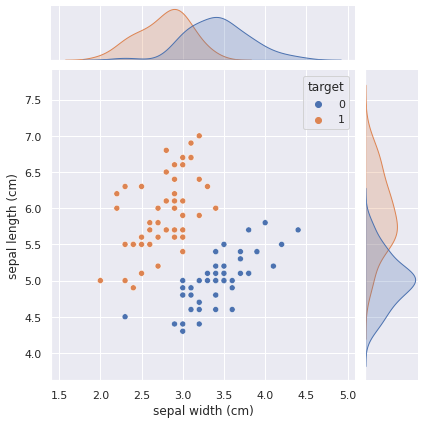

In [5]:
sns.jointplot(data=df, x="sepal width (cm)", y="sepal length (cm)", hue="target")

## Training

In [6]:
config = pc.init_config("./config.yml")
config

{'modelling': {'target_clf': 'target',
  'numeric_cols': ['sepal width (cm)',
   'sepal length (cm)',
   'petal width (cm)',
   'petal length (cm)']}}

In [7]:
setup, X_sample, y_sample = pc.modelling.prepare_data(
    train_data=df,
    config=config,
)

In [8]:
metric = "f1"

In [15]:
compare_df, model_dict = pc.modelling.compare_algorithms(
    setup=setup,
    include=[
        "lr",
        "dt",
        "rf",
        "ridge",
        "perceptron",
        "passive-aggressive",
        "extratree",
        "extratrees",
        "knn",
        "nb",
        "linearsvc",
        "rbfsvc",
    ],
    sort="f1",
    return_models=True,
)
compare_df

,algorithm,accuracy,precision,recall,f1,roc_auc,Fit time (s)
0,nb,1.0,1.0,1.0,1.0,1.0,0.014
1,linearsvc,1.0,1.0,1.0,1.0,1.0,0.014
2,perceptron,1.0,1.0,1.0,1.0,1.0,0.016
3,knn,1.0,1.0,1.0,1.0,1.0,0.016
4,dt,1.0,1.0,1.0,1.0,1.0,0.017
5,passive-aggressive,1.0,1.0,1.0,1.0,1.0,0.019
6,rbfsvc,1.0,1.0,1.0,1.0,1.0,0.022
7,ridge,1.0,1.0,1.0,1.0,1.0,0.037
8,lr,1.0,1.0,1.0,1.0,1.0,0.052
9,extratrees,1.0,1.0,1.0,1.0,1.0,0.729


In [11]:
model_dict

{'lr': LogisticRegression(),
 'dt': DecisionTreeClassifier(),
 'rf': RandomForestClassifier(),
 'ridge': RidgeClassifier(),
 'perceptron': Perceptron(),
 'passive-aggressive': PassiveAggressiveClassifier(),
 'extratree': ExtraTreeClassifier(),
 'extratrees': ExtraTreesClassifier(),
 'knn': KNeighborsClassifier(),
 'nb': GaussianNB(),
 'linearsvc': LinearSVC(),
 'rbfsvc': SVC()}

In [17]:
algorithm, reference_metric = compare_df.loc[len(compare_df)-1, ["algorithm", metric]]
# reference_metric = compare_df.loc[len(compare_df)-1, metric]
best_feature_list = pc.modelling.reduce_feature_space(setup, algorithm, metric, reference_metric, acceptable_loss=0.5)

New metric: 0.99, worst feature: sepal width (cm)
Updating reference metric...
New metric: 1.0, worst feature: sepal length (cm)
Updating reference metric...
New metric: 1.0, worst feature: petal width (cm)


['petal length (cm)']